# Matplotlib and Seaborn

In [1]:
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import seaborn as sb
sb.set_style('whitegrid')
import pandas as pd
from matplotlib import rcParams

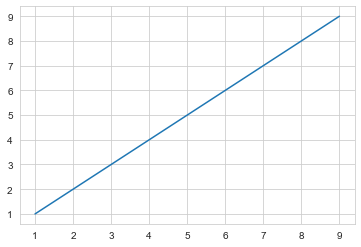

In [3]:
x = range(1,10)
y = [1,2,3,4,5,6,7,8,9]

plt.plot(x,y)

In [4]:
tips = sb.load_dataset('tips')

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
size = tips['total_bill']

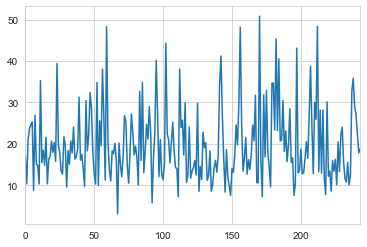

In [16]:
size.plot()

In [18]:
df = tips[['tip','total_bill']]

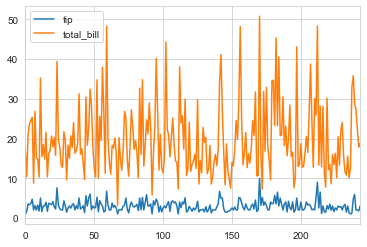

In [19]:
df.plot()

## Pie Charts

In [74]:
rcParams['figure.figsize']=10,8

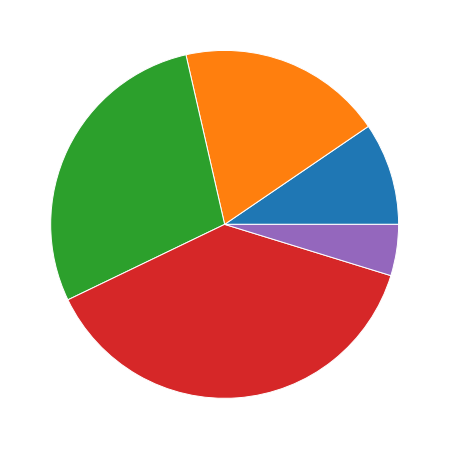

In [75]:
x = [1,2,3,4,0.5]
plt.pie(x)
plt.show()

In [76]:
no_of_smokers = tips['smoker'].value_counts()

In [77]:
no_of_smokers

No     151
Yes     93
Name: smoker, dtype: int64

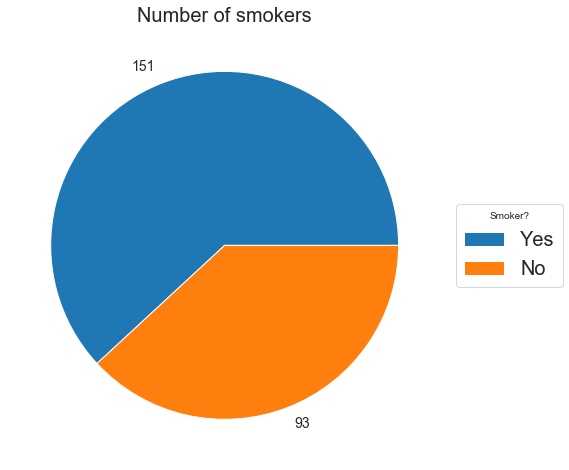

In [83]:
labels = ['Yes', 'No']
plt.pie(no_of_smokers, labels=[no_of_smokers.No, no_of_smokers.Yes], textprops={'fontsize': 14})
plt.title('Number of smokers',fontsize=20)
plt.legend(labels, title='Smoker?', prop={'size': 20}, loc="center right", bbox_to_anchor=(0.8, 0, 0.5, 1))
plt.savefig('numer_of_smokers.png')
plt.show()


In [79]:
%ls num*

numer_of_smokers.png


Displaying an image in the notebook

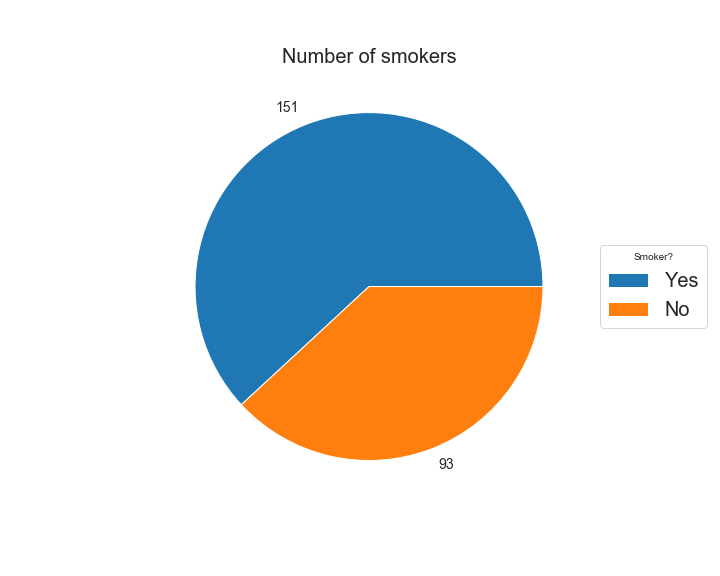

In [94]:
from IPython.display import Image
Image('numer_of_smokers.png')

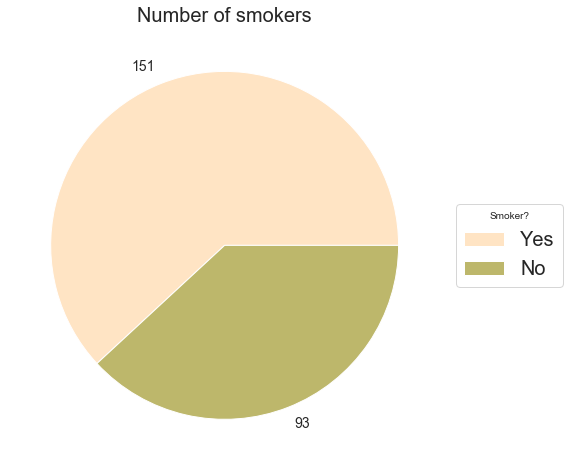

In [89]:
labels = ['Yes', 'No']
color_theme = ['#FFE4C4', '#BDB76B'] # Set colour scheme

plt.pie(no_of_smokers,
        colors=color_theme, 
        labels=[no_of_smokers.No, no_of_smokers.Yes],
        textprops={'fontsize': 14})

plt.title('Number of smokers',fontsize=20)

plt.legend(labels,
           title='Smoker?',
           prop={'size': 20},
           loc="center right",
           bbox_to_anchor=(0.8, 0, 0.5, 1))
plt.show()